# Exercise 1

- a well established and diffused method for detecting a disease in blood fails to detect the presence of disease in 15% of the patients that actually have the disease.

- A young UniPD startUp has developed an innovative method of screening. During the qualification phase, a random sample of n = 75 patients known to have the disease is screened using the new method.

what is the probability distribution of y, the number of times the new method fails to detect the disease ?

Warning message:
"Removed 48 rows containing missing values or values outside the scale range
(`geom_bar()`)."


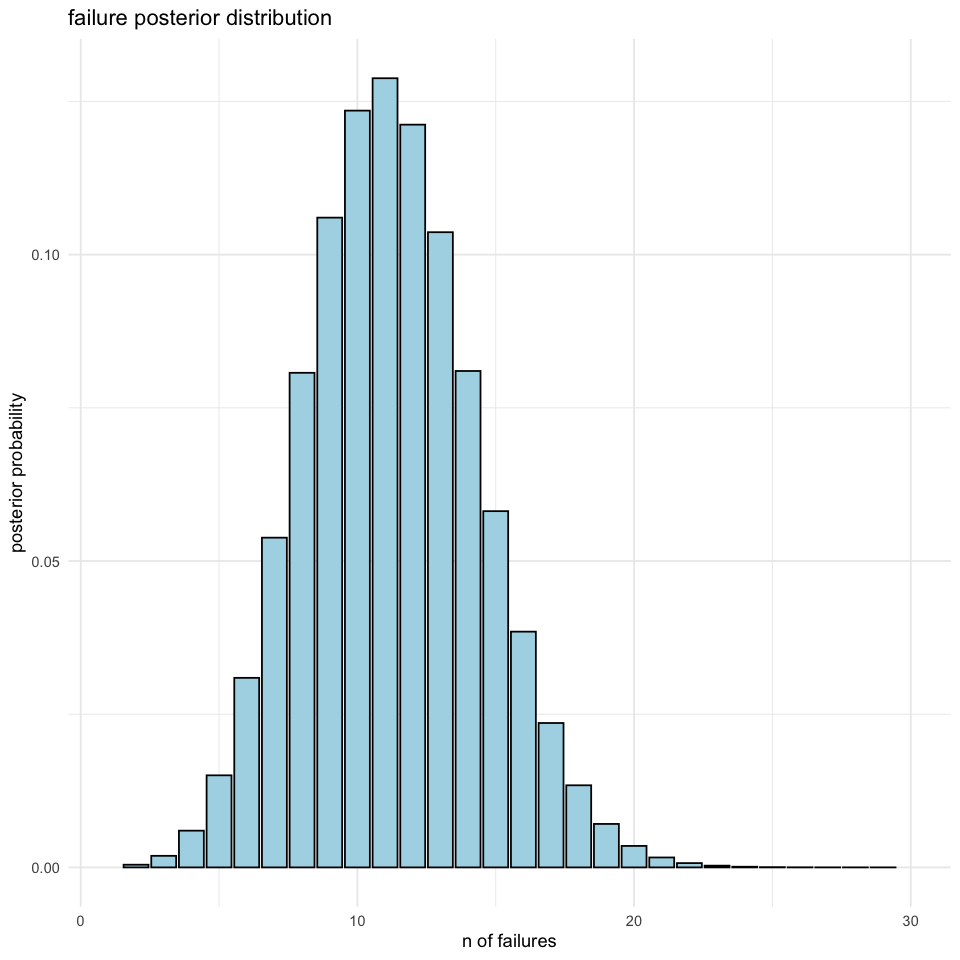

In [300]:
library(ggplot2)

# lets compute a binomial distribution from the data 
# binomial distribution parameters
n <- 75
p <- 0.15

# building distribution 
failures <- 0:n
pf <- dbinom(failures, size = n, prob = p)

# plotting
options(repr.plot.width = 8, repr.plot.height = 8)
data <- data.frame(failures = failures, Posterior = pf)
ggplot(data, aes(x = failures, y = Posterior, fill = failures)) +
  geom_bar(stat = 'identity', color = 'black', show.legend = FALSE, fill = 'light blue') +
  theme_minimal()+ 
  xlim(1,30) +
  labs(x = 'n of failures', y = 'posterior probability', title = 'failure posterior distribution') 


on the n = 75 patients sample, the new method fails to detect the disease in y = 6 cases. What is the frequentist estimator of the failure probability of the new method ?

In [301]:
# frequentist approach
n <- 75
fail <- 6

p_f <- fail/n
var_f <- p_f*(1-p_f)/n
err_f <- sqrt(var_f)

cat('The failure probability estimator is:', p_f * 100, '+/-', round(3*err_f,2) ,'%')

The failure probability estimator is: 8 +/- 0.09 %

setup a bayesian computation of the posterior probability,assuming a beta distribution with mean value 0.15 and standard deviation 0.14. Plot the posterior distribution for y, and mark on the plot the mean value and variance


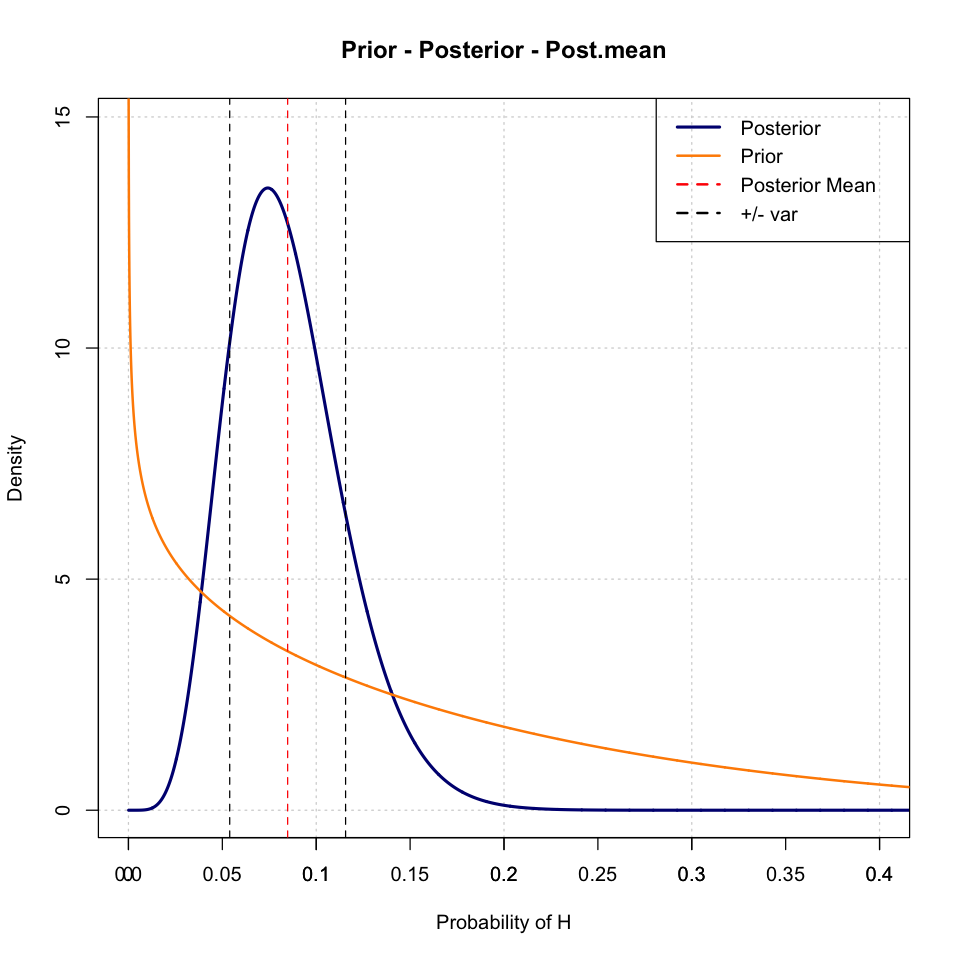

In [302]:
# Bayesian approach: prior - posterior

# x-axis for the distribution
delta_p <- 0.0001
p <- seq(0.0001, 0.9999, by = delta_p)  

# Beta prior distribution parameter 
mean_beta <- 0.15
std_beta <- 0.14
var_beta <- std_beta^2

# Calculating alpha and beta for the Beta distribution
alpha <- ((mean_beta * (1 - mean_beta) / var_beta) - 1) * mean_beta
beta <- ((mean_beta * (1 - mean_beta) / var_beta) - 1) * (1 - mean_beta)

# Beta prior
beta_prior <- dbeta(p, alpha, beta)

# Binomial likelihood
likelihood <- dbinom(x = fail, size = n, prob = p)

# Normalization factor
norm_factor <- sum(likelihood * beta_prior) * delta_p

# Posterior distribution
posterior <- (likelihood * beta_prior) / norm_factor

# posterioir params
mean_dist <- sum(posterior * p) * delta_p
var_dist <- sum(posterior * (p - mean_dist)^2) * delta_p

# Plots
options(repr.plot.width = 8, repr.plot.height = 8)
plot(p, posterior,
     type = 'l',                   
     col = 'navy',                 
     lwd = 2.5,                    
     xlab = "Probability of H",  
     ylab = "Density",             
     main = "Prior - Posterior - Post.mean",   
     ylim = c(0,  max(posterior) * 1.1),      
     xlim = c(0, 0.4),
     panel.first = grid()) 
axis(1, at = seq(0, 0.4, by = 0.05), labels = seq(0, 0.4, by = 0.05))


lines(p, beta_prior, lwd = 2, lty = 1, col = 'darkorange')
abline(v = mean_dist, lty = 2, col = "red")
abline(v = mean_dist + sqrt(var_dist), lty = 2, col = "black")
abline(v = mean_dist - sqrt(var_dist), lty = 2, col = "black")

legend("topright", legend = c("Posterior", "Prior", "Posterior Mean", "+/- var"),
       col = c("navy", "darkorange", "red", "black"), lty = c(1, 1, 2, 2), lwd = c(2.5, 2, 2, 2))


Perform a test of hypothesis assuming that if the probability of failing to the detect the desease in ill patients is greater or equal than 15%, the new test is no better that the traditional method. Test the sample at a 5% level of significance in the Bayesian way.

95% confidence interval: [ 0.0347 , 0.1542 ]
p_0=0.15 C [ 0.0347 , 0.1542 ]


H_0 accepted

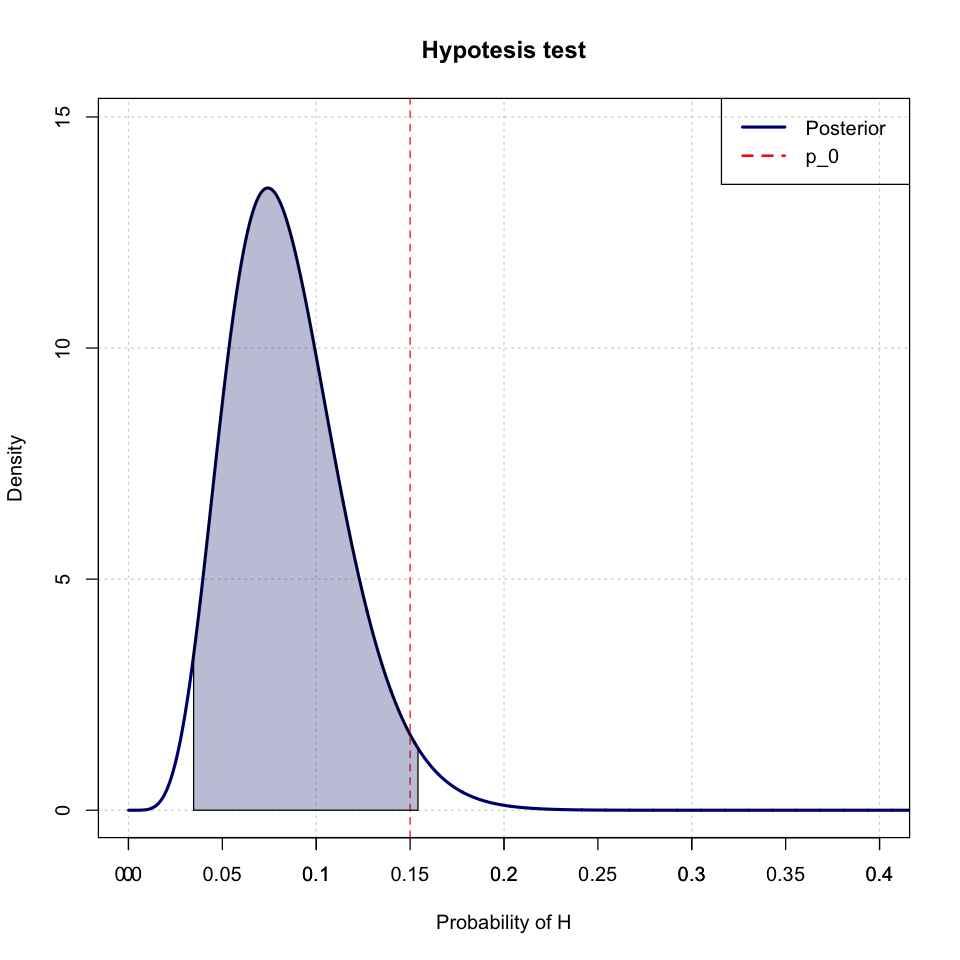

In [303]:
# Bayesian H.T. (p_0 = 15%)
# H_0: (p <= p_0), H_1: (p > p_0)
# H_0 has the posterior distribution computed above 
# we integrate the posterior and evalued with the alpha = 5% 

cum_posterior <- cumsum(posterior) * delta_p
lb_index <- which(cum_posterior >= 0.025)[1]
ub_index <- which(cum_posterior >= 0.975)[1]
lb <- p[lb_index]
ub <- p[ub_index]

options(repr.plot.width = 8, repr.plot.height = 8)
plot(p, posterior,
     type = 'l',                   
     col = 'navy',                 
     lwd = 2.5,                    
     xlab = "Probability of H",  
     ylab = "Density",             
     main = "Hypotesis test",   
     ylim = c(0,  max(posterior) * 1.1),      
     xlim = c(0, 0.4),
     panel.first = grid()) 
axis(1, at = seq(0, 0.4, by = 0.05), labels = seq(0, 0.4, by = 0.05))

# Add posterior mean and variance lines
abline(v = 0.15, lty = 2, col = "red")

# Add region for 95% credible interval
polygon(c(lb, p[p >= lb & p <= ub], ub),
        c(0, posterior[p >= lb & p <= ub], 0),
        col = rgb(0.1, 0.2, 0.5, 0.3))

legend("topright", legend = c("Posterior", "p_0"),
       col = c("navy", "red" ), lty = c(1, 2), lwd = c(2.5, 2))

cat("95% confidence interval: [", lb, ",", ub, "]\n")
cat("p_0=0.15 C [", lb, ",", ub, "]\n")
cat("H_0 accepted")



Perform the same hypothesis test in the classical frequentist way.


In [304]:
# Frequentist H.T. (p_0 = 15%)
# H_0: (p <= p_0), H_1: (p > p_0)
# H_0 has the binomial distribution with p=0.15 n=75
binom.test(x=6, n=75, p=0.15)
cat('p-value > alpha, we accept H_0')


	Exact binomial test

data:  6 and 75
number of successes = 6, number of trials = 75, p-value = 0.1047
alternative hypothesis: true probability of success is not equal to 0.15
95 percent confidence interval:
 0.02992514 0.16603687
sample estimates:
probability of success 
                  0.08 


p-value > alpha, we accept H_0

# Exercise 2

- a researcher has collected n=16 observations that are supposed to come from a Normal distribution with known variance σ2 = 4:\
4.09 4.68 1.87 2.62 5.58 8.68 4.07 4.78 4.79 4.49 5.85 5.09 2.40 6.27 6.30 4.47
- assuming the prior is a step funtion: $g(\mu)$



\begin{cases}
\mu & \text{for } 0 < \mu \leq 3, \\
3 & \text{for } 3 < \mu \leq 5, \\
8 - \mu & \text{for } 5 < \mu \leq 8, \\
0 & \text{for } \mu > 8.
\end{cases}


find the posterior distribution, the posterior mean and standard deviation

Posterior Mean: 4.73 
Posterior SD: 0.48 


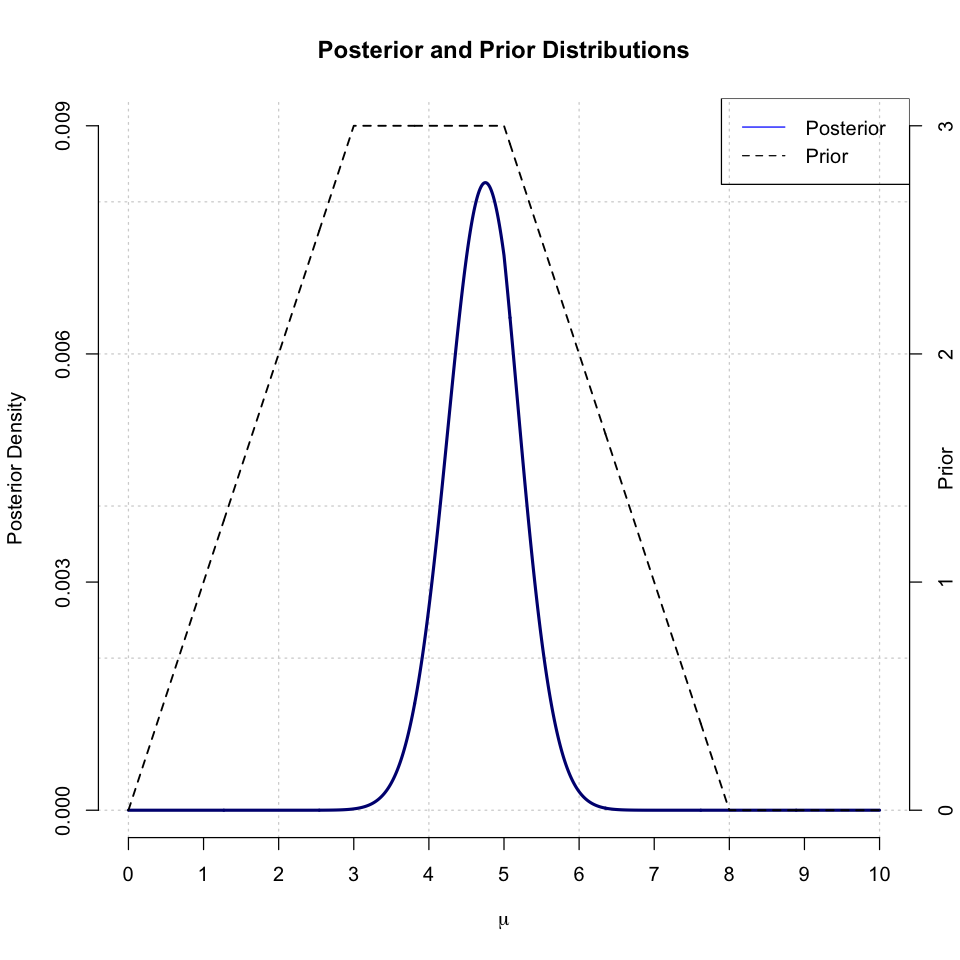

In [312]:
# observation
observation <- c(4.09, 4.68, 1.87, 2.62, 5.58, 8.68, 4.07, 4.78, 4.79, 4.49, 5.85, 5.09, 2.40, 6.27, 6.30, 4.47)
n <- length(observation)

# parameters
lik_var <- 4
lik_sig <- sqrt(lik_var)
mean_sample <- mean(observation)

# mu (x axis)
m <- seq(0, 10, 0.01)

# mu Prior
prior <- function(mu) {
    if (mu > 0 && mu <= 3) {
        return(mu)
    } else if (mu > 3 && mu <= 5) {
        return(3)
    } else if (mu > 5 && mu <= 8) {
        return(8 - mu)
    } else {
        return(0)
    }
}
prior_array <- sapply(m, prior)

# mu Likelihood
likelihood <- function(mu, y) {
    like <- dnorm(y, mean = mu, sd = lik_sig)
    return(prod(like))
}
likelihood_array <- sapply(m, likelihood, y = observation)

# mu posterior
posterior <- function(mu, y) {
    return(likelihood(mu, y) * prior(mu))
}

# computing posterior
posterior_values <- sapply(m, posterior, y = observation)

# Normalization factor
posterior_values <- posterior_values / (sum(posterior_values))

# posterior mean
posterior_mean <- sum(m * posterior_values)

# posterior sd
posterior_sd <- sqrt(sum((m - posterior_mean)^2 * posterior_values))

# plotting posterior
plot(m, posterior_values, 
     type = "l",
     col = "navy", 
     lty = 1, 
     lwd = 2.5,
     ylab = "Posterior Density", 
     xlab = expression(mu), 
     main = "Posterior and Prior Distributions",
     panel.first = grid(),
     ylim = c(0, 0.009),
     axes = FALSE)  # Disattiva gli assi predefiniti
axis(side = 1, at = seq(0, max(m), 1))  # Asse x
axis(side = 2, at = seq(0, 0.009, 0.003))  # Asse y con solo i ticks specificati


# double y axis for prior
par(new = TRUE)
plot(m, prior_array, 
     type = "l", 
     col = "black", 
     lty = 2, 
     lwd = 1.5,
     axes = FALSE, 
     xlab = "", 
     ylab = "")
axis(side = 4, at = seq(0,max(prior_array),1))
mtext("Prior", side = 4, line=1)

# legend
legend("topright", legend = c("Posterior", "Prior"), col = c("blue", "black"), lty = c(1, 2))

# print
cat("Posterior Mean:", round(posterior_mean,2), "\n")
cat("Posterior SD:", round(posterior_sd,2), "\n")



 find the 95% credibility interval for μ

In [306]:
# computing credibility interval 
cumulative <- cumsum(posterior_values)
lb <- m[cumulative >= 0.025]
ub <- m[cumulative >= 0.975]

cat('95% credibility interval [', lb[1],',', ub[1],']')


95% credibility interval [ 3.76 , 5.66 ]

plot the posterior distribution, indicating on the same plot: the mean value, the standard deviation, and the 95% credibility interval

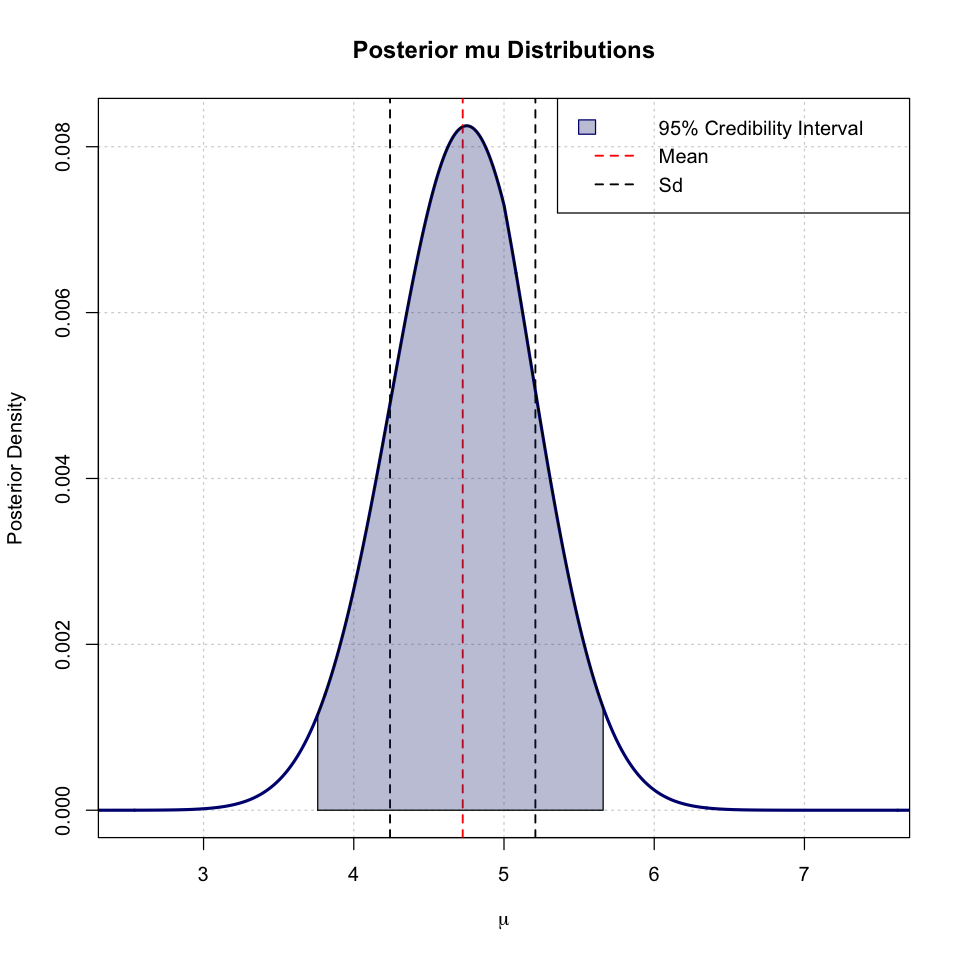

In [309]:
# plot distribution and metrics 
plot(m, posterior_values, 
     type = "l",
     col = "navy", 
     lty = 1, 
     lwd = 2.5,
     ylab = "Posterior Density", 
     xlab = expression(mu), 
     main = "Posterior mu Distributions",
     xlim = c(2.5,7.5),
     panel.first = grid())  
abline(v = posterior_mean , col = 'red', lty = 2, lwd = 1.5)
abline(v = posterior_mean - posterior_sd, lty = 2, lwd = 1.5)
abline(v = posterior_mean + posterior_sd, lty = 2, lwd = 1.5)

# plotting area
polygon(x = c(m[m >= lb[1] & m <= ub[1]], rev(m[m >= lb[1] & m <= ub[1]])), # x = (x parte superiore, x parte inferiore)
        y = c(posterior_values[m >= lb[1] & m <= ub[1]], rep(0, sum(m >= lb[1] & m <= ub[1]))), # y = (y parte superiore, y parte inferiore)
        col = rgb(0.1, 0.2, 0.5, 0.3))

legend("topright", legend = c("95% Credibility Interval", "Mean", "Sd"), 
       fill = c(rgb(0.1, 0.2, 0.5, 0.3), NA, NA),
       border = c('navy', NA, NA),  
       lty = c(NA, 2, 2), 
       col = c(NA, "red", "black"), 
       lwd = c(NA, 1.5, 1.5), 
       cex = 1)


plot, on the same graph, the prior, the likelihood and the posterior distribution

Posterior Mean: 4.73 
Posterior SD: 0.48 


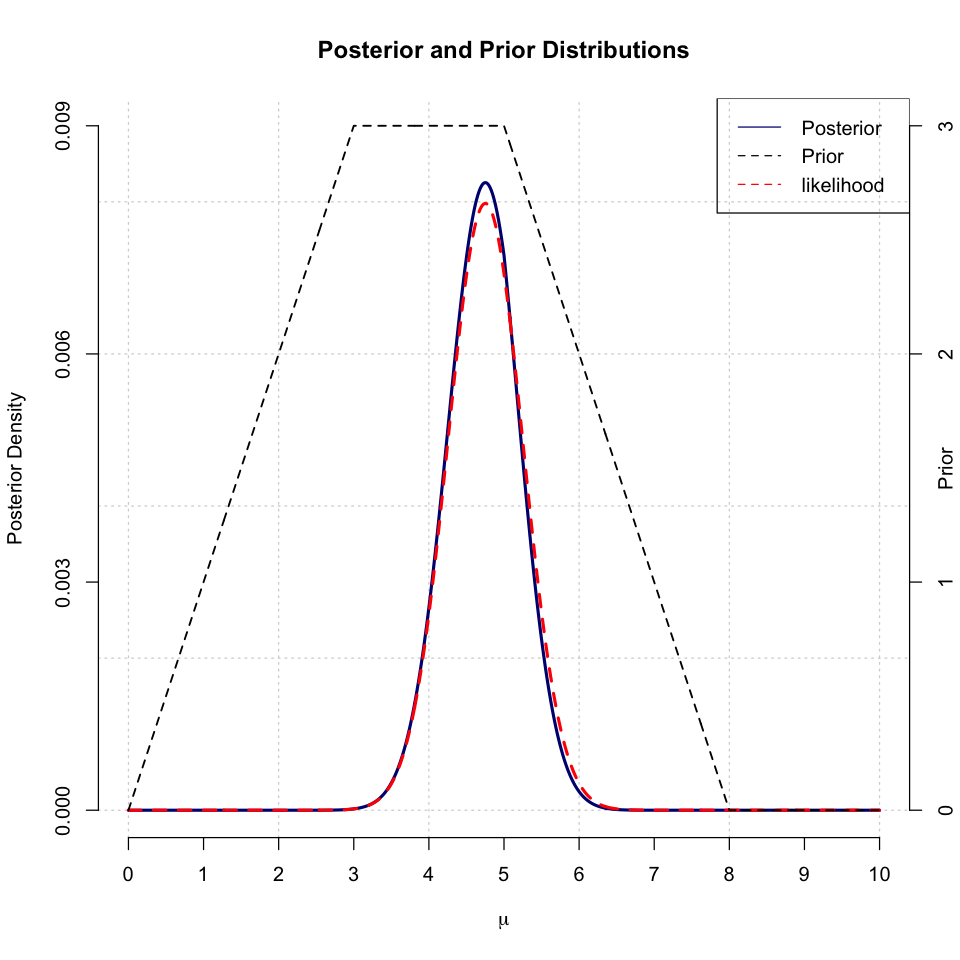

In [315]:
plot(m, posterior_values, 
     type = "l",
     col = "navy", 
     lty = 1, 
     lwd = 2.5,
     ylab = "Posterior Density", 
     xlab = expression(mu), 
     main = "Posterior and Prior Distributions",
     panel.first = grid(),
     ylim = c(0, 0.009),
     axes = FALSE) 

lines(m, 
      likelihood_array/sum(likelihood_array),
      col = 'red',
      lwd = 2.5,
      lty = 2)
axis(side = 1, at = seq(0, max(m), 1))  
axis(side = 2, at = seq(0, 0.009, 0.003))

par(new = TRUE)
plot(m, prior_array, 
     type = "l", 
     col = "black", 
     lty = 2, 
     lwd = 1.5,
     axes = FALSE, 
     xlab = "", 
     ylab = "")
axis(side = 4, at = seq(0,max(prior_array),1))
mtext("Prior", side = 4, line=1)

legend("topright", legend = c("Posterior", "Prior", 'likelihood'), col = c("navy", "black", 'red'), lty = c(1, 2,2))

cat("Posterior Mean:", round(posterior_mean,2), "\n")
cat("Posterior SD:", round(posterior_sd,2), "\n")

# Exercise 3

- The six boxes toy model is described in reference.
- Labeling the boxes as follows: H0,...H5

selects a random box

In [5]:
set.seed(5)

b0 = c(0,0,0,0,0)
b1 = c(1,0,0,0,0)
b2 = c(1,1,0,0,0)
b3 = c(1,1,1,0,0)
b4 = c(1,1,1,1,0)
b5 = c(1,1,1,1,1)

boxes = c(b0,b1,b2,b3,b4,b5)
boxes = matrix(data = boxes, nrow = 6, ncol = 5)
choosen_box <- boxes[round(runif(1, min = 1, max = 6)),]

cat('Choosen box:','[',choosen_box,']')


Choosen box: [ 0 0 0 0 1 ]

makes random sampling from the box

In [6]:
set.seed(5)

choosen_stone <- choosen_box[round(runif(1, min = 1, max = 5))]
cat('choosen stone:', choosen_stone)

choosen stone: 0

prints on the standard output the probability of selecting each box

In [7]:
p = round(1/6,4)
cat('Probability of choosing a box: 1/6 =', p*100 , '%')

Probability of choosing a box: 1/6 = 16.67 %

plots the probability for each box as a function of the number of trial

In [8]:
# we randomly select a box, and start to sample stones from the box
# after each extraction, we update the probabilities of each hypothesis, using Bayes theorem’

set.seed(1234)

# P(H_j | I)
initial_prior <-  1/6

# P(E_w | H_j)
likelihood <- function(x,e){
    if(e == 1){
        x/5
    }
    else{
        (5-x)/5
    }
}

#extraction process
total_extraction <- 40
choosen_stone <- choosen_box[round(runif(total_extraction, min = 1, max = 5))]

posterior <- matrix(0,ncol=6, nrow = total_extraction +1 )
posterior[1,] <- c(1/6, 1/6, 1/6, 1/6, 1/6, 1/6)

for (i in 1:total_extraction) {
    for (box in 0:5) {
        prior <- posterior[i, box + 1]
        likel <- likelihood(box, choosen_stone[i])
        # Bayes theorem 
        posterior[i + 1, box + 1] <- (prior * likel)
    }
    posterior[i + 1, ] <- posterior[i + 1, ] / sum(posterior[i + 1, ])
}

Extracted box: [ 0 0 0 0 1 ]
Extraction: 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0

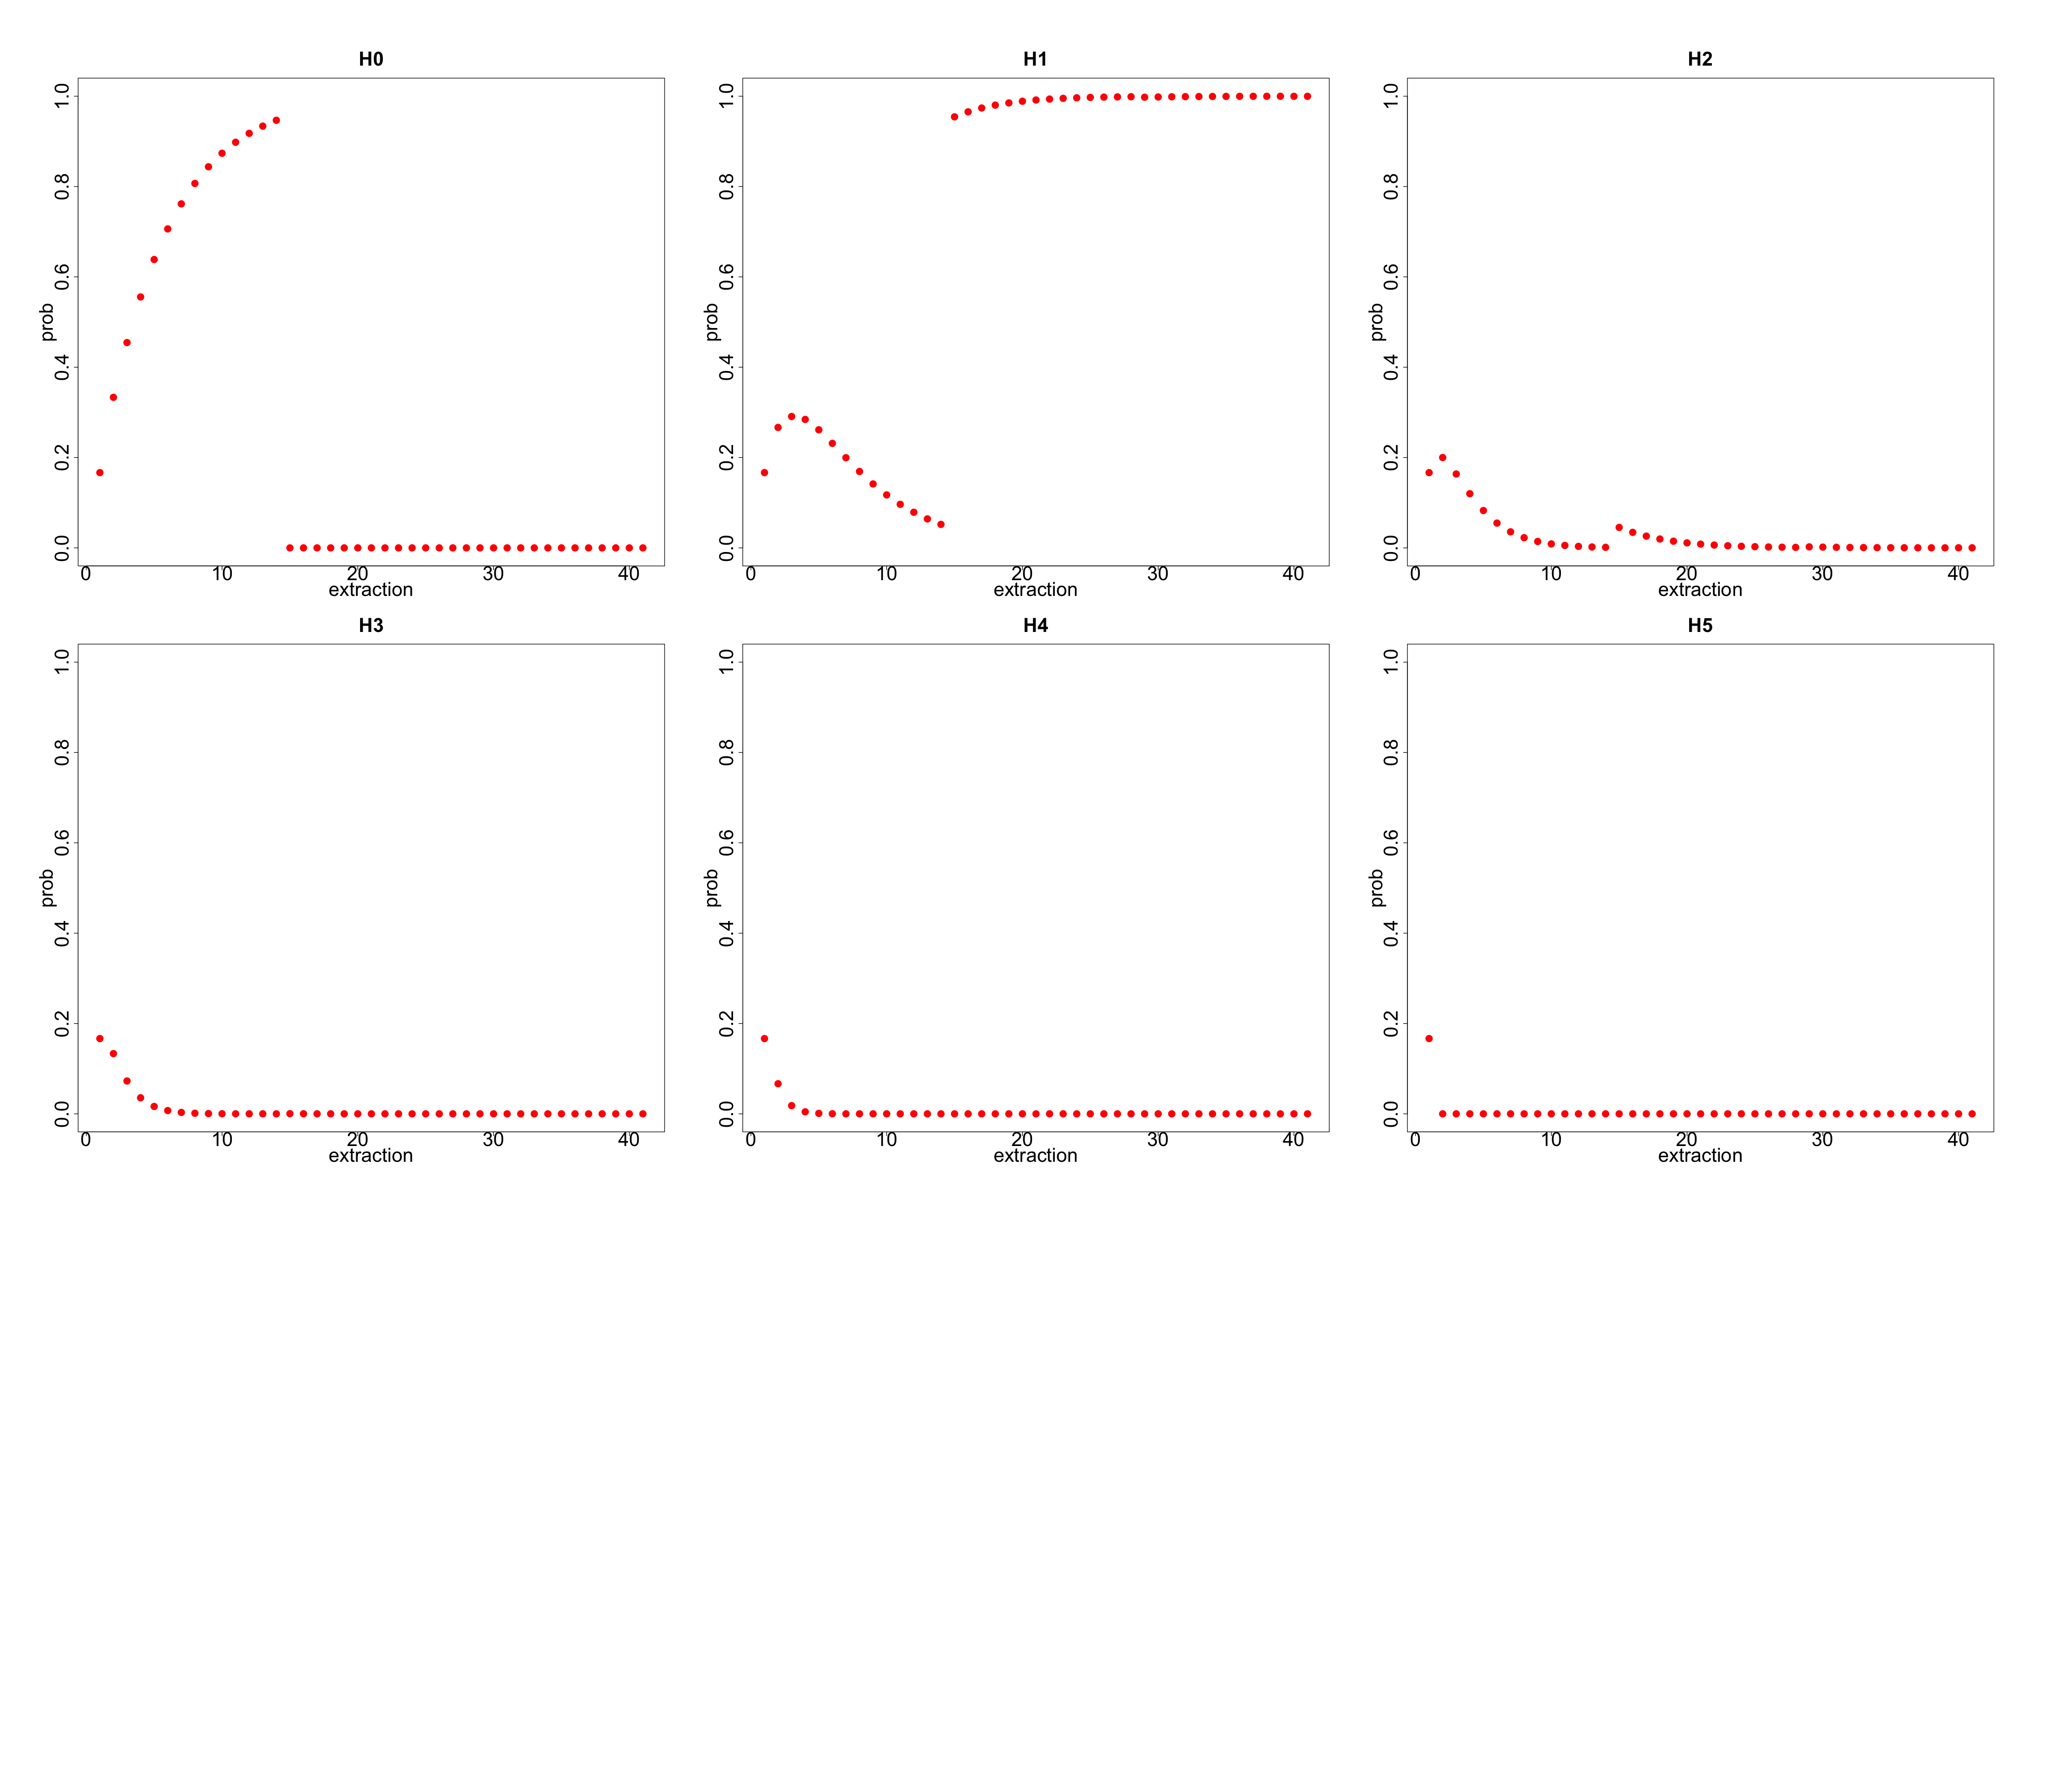

In [16]:
# 4 figures arranged in 2 rows and 2 columns #
options(repr.plot.width = 35, repr.plot.height = 30)
par(mfrow = c(3, 3), mar = c(5, 5, 5, 5), oma = c(5, 5, 5, 5))
plot(c(1:(total_extraction+1)), posterior[,1], col = 'red', pch =16, cex = 2.5, cex.lab = 3, cex.axis = 3, cex.main = 3,  main = 'H0', xlab = 'extraction', ylab = 'prob', ylim = c(0,1))
plot(c(1:(total_extraction+1)), posterior[,2], col = 'red', pch =16, cex = 2.5, cex.lab = 3, cex.axis = 3, cex.main = 3,  main = 'H1', xlab = 'extraction', ylab = 'prob', ylim = c(0,1))
plot(c(1:(total_extraction+1)), posterior[,3], col = 'red', pch =16, cex = 2.5, cex.lab = 3, cex.axis = 3, cex.main = 3,  main = 'H2', xlab = 'extraction', ylab = 'prob', ylim = c(0,1))
plot(c(1:(total_extraction+1)), posterior[,4], col = 'red', pch =16, cex = 2.5, cex.lab = 3, cex.axis = 3, cex.main = 3,  main = 'H3', xlab = 'extraction', ylab = 'prob', ylim = c(0,1))
plot(c(1:(total_extraction+1)), posterior[,5], col = 'red', pch =16, cex = 2.5, cex.lab = 3, cex.axis = 3, cex.main = 3,  main = 'H4', xlab = 'extraction', ylab = 'prob', ylim = c(0,1))
plot(c(1:(total_extraction+1)), posterior[,6], col = 'red', pch =16, cex = 2.5, cex.lab = 3, cex.axis = 3, cex.main = 3,  main = 'H5', xlab = 'extraction', ylab = 'prob', ylim = c(0,1))
cat('Extracted box: [', choosen_box, ']\n')
cat('Extraction:',choosen_stone)

